In [1]:
import pandas as pd
import numpy as np

In [131]:
np.__version__

'1.14.3'

In [135]:
import sklearn 
sklearn.__version__

'0.20.1'

In [136]:
author = 'Song Joo AllenEdgarPoe'

#### 데이터 가공하기

In [102]:
data = pd.read_csv('C:/Users/chsjk/OneDrive/Documents/MATLAB/drtoolbox/TOLz.csv')
username = np.array([data.username]) #학생 이름
pca1 = np.array([data['pc1']]).T
pca2 = np.array([data['pc2']]).T
pca3 = np.array([data['pc3']]).T
X = np.hstack((pca1,pca2,pca3))  #학생 데이터. (22,3)
y = np.array(data.target)
feature_names = np.array([['pc1','pc2','pc3']])

#### 데이터 scatter plot으로 유형 확인하기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002329359D9B0>,
      dtype=object)

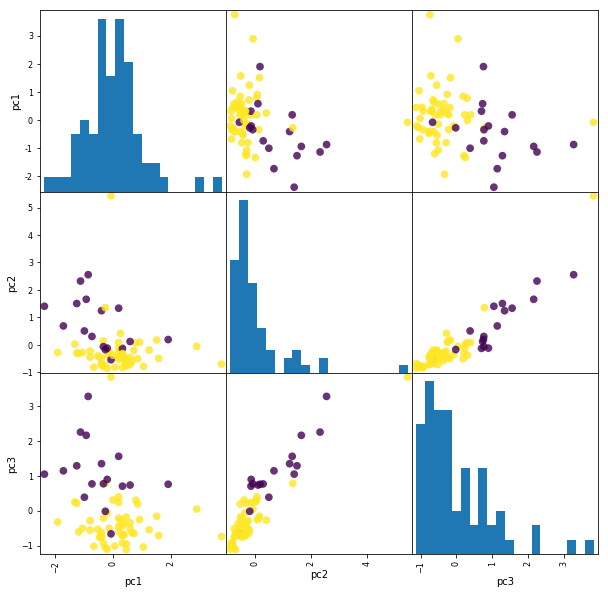

In [130]:
%matplotlib inline
import pandas as pd
dataset = data.drop('username', axis = 1)
dataset = data.drop('target', axis = 1)
pd.plotting.scatter_matrix(dataset, c=y, figsize = (10,10), marker='o',
                           hist_kwds = {'bins':20}, s =60, alpha =.8)

#### train_test_split
scikit-learn의 내장 모델인 train_test_split 사용하기

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print('X_train크기: {}, X_test크기: {}'.format(X_train.shape, X_test.shape))

X_train크기: (51, 3), X_test크기: (17, 3)


### KNN 모델 만들기

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

#### 모델 평가하기

In [126]:
y_predict = knn.predict(X_test)
print('테스트 세트에 대한 예측값: {}'.format(y_predict))

테스트 세트에 대한 예측값: [1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1]


In [129]:
print('정확도: {}'.format(np.mean(y_predict == y_test)))

정확도: 0.9411764705882353
